# Taller 3 Geometria Computacional y Diferencial

In [375]:
reset -fs

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import math
import sympy as sp
import plotly.express as px
import plotly.graph_objects as go

# Parte 1 Busqueda ortogonal

## Clase Nodo

In [377]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.depth = None

    def __repr__(self):
        return f"{self.data}"

    def is_leaf(self):
        return self.left is None and self.right is None

    def in_order(self):
        inorderArr = []
        if self.left is not None:
            leftInorderArr = self.left.in_order()
            inorderArr.extend(leftInorderArr)
        inorderArr.append(self.data)
        if self.right is not None:
            rightInorderArr = self.right.in_order()
            inorderArr.extend(rightInorderArr)
        return inorderArr

    def get_leaves(self):
        arr = []
        if self.is_leaf():
            arr.append(self.data)
            return arr
        if self.left is not None:
            leftLeafs = self.left.get_leaves()
            arr.extend(leftLeafs)
        if self.left is not None:
            rightLeafs = self.right.get_leaves()
            arr.extend(rightLeafs)
        return arr


In [378]:
def complete(node, sorted_arr):
    if node is None:
        return
    if node.right is not None and node.left is None:
        node.left = Node(node.data)
        complete(node.right, sorted_arr)
    elif node.right is None and node.left is None and node.data != sorted_arr[-1]:
        node.left = Node(node.data)
        node.right = Node(sorted_arr[sorted_arr.index(node.data) + 1])
    else:
        complete(node.left, sorted_arr)
        complete(node.right, sorted_arr)

def BBT(sorted_arr):
  if not sorted_arr:
    return None
  mid = int((len(sorted_arr) - 1) / 2)
  newRoot = Node(sorted_arr[mid])
  newRoot.left = BBT(sorted_arr[:mid])
  newRoot.right = BBT(sorted_arr[mid + 1:])
  return newRoot

def array2completed_tree(arr):
    root = BBT(arr)
    complete(root, arr)
    return root

In [379]:
def find_split(T, x, xp):
    v = T
    while (not v.is_leaf()) and (v.data >= xp or v.data < x):
        if x < v.data:
            v = v.left
        else:
            v = v.right
    return v

def range_query(T, x, xp):
    s = []
    vs = find_split(T, x, xp)
    if vs.is_leaf():
        if x <= vs.data <= xp:
            s.append(vs.data)
    else:
        v = vs.left
        while not v.is_leaf():
            if x <= v.data:
                r_leaves = v.right.get_leaves()
                s.extend(r_leaves)
                v = v.left
            else:
                v = v.right
        if x <= v.data <= xp:
            s.append(v.data)
        v = vs.right
        while not v.is_leaf():
            if xp >= v.data:
                l_leaves = v.left.get_leaves()
                s.extend(l_leaves)
                v = v.right
            else:
                v = v.left
        if x <= v.data <= xp:
            s.append(v.data)
    return s

In [380]:

def build_kd_tree(P, depth):
  #print(P)

  if len(P) == 1:
    return Node(P[0])

  else:
    if depth % 2 == 0:
      P_sorted = deepcopy(P)
      P_sorted.sort(key=lambda p: p[0])
      P1 = P_sorted[:math.ceil(len(P)/2)]
      P2 = P_sorted[math.ceil(len(P)/2):]
      l = P1[-1]
    else:
      P_sorted = deepcopy(P)
      P_sorted.sort(key=lambda p: p[1])
      P1 = P_sorted[:math.ceil(len(P)/2)]
      P2 = P_sorted[math.ceil(len(P)/2):]
      l = P1[-1]
    v = Node(l)
    v.depth = depth
    if P1:
        v_left = build_kd_tree(P1, depth + 1)
        v.left = v_left
    if P2:
        v_right = build_kd_tree(P2, depth + 1)
        v.right = v_right
  return v


def isInRange(w, R):
    x1, y1 = w[0]
    x2, y2 = w[1]
    x_min, x_max = R[0]
    y_min, y_max = R[1]
    return x_min <= x1 <= x_max and y_min <= y1 <= y_max and x_min <= x2 <= x_max and y_min <= y2 <= y_max

def isInRegion(w, R):
    x1_min, x1_max = w[0]
    y1_min, y1_max = w[1]
    x2_min, x2_max = R[0]
    y2_min, y2_max = R[1]

    return not (x1_max < x2_min or x2_max < x1_min or y1_max < y2_min or y2_max < y1_min)

def point_in_range(v, R):
    return R[0][0] <= v[0] <= R[0][1] and R[1][0] <= v[1] <= R[1][1]


def search_Kd_tree(v, R, w=None):
    if w is None:
        w = [[-np.inf, np.inf], [-np.inf, np.inf]]
    S = []
    if v.is_leaf():
        if point_in_range(v.data, R):
            S.append(v.data)
    else:
        if v.left:
            w1 = deepcopy(w)
            if v.depth%2==0:
                w1[0][1] = v.data[0]
            else:
                w1[1][1] = v.data[1]

            childs_left = v.left.get_leaves()
            if isInRange(w1, R):
                S.extend(childs_left)
            elif isInRegion(w1, R):
                S.extend(search_Kd_tree(v.left, R, w1))
        if v.right:
            w2 = deepcopy(w)
            if v.depth%2==0:
                w2[0][0] = v.data[0]
            else:
                w2[1][0] = v.data[1]
            childs_right = v.right.get_leaves()
            if isInRange(w2, R):
                S.extend(childs_right)
            elif isInRegion(w2, R):
                S.extend(search_Kd_tree(v.right, R, w2))

    return S

## Solución

### Importar datos y creacion de recursos

In [381]:
data = pd.read_csv("https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/star_selection.csv")
vmag = data["Vmag"].tolist()
plx = data["Plx"].tolist()
ids = data["Unnamed: 0"].tolist()

plx_vmag = [(vmag[i],plx[i]) for i in range(len(plx))]

# sort the arrays
vmag.sort()
plx.sort()


### 1.1

,id,Plx
0,637,20.04
1,638,20.05
2,639,20.10
3,640,20.12
4,641,20.15
...,...,...
201,838,88.85
202,839,90.16
203,840,94.93
204,841,96.74


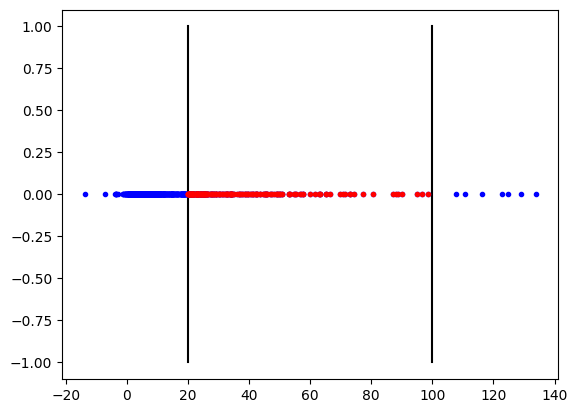

In [382]:
T = array2completed_tree(plx)
a = range_query(T, 20, 100)
df = pd.DataFrame({"id": [ids[i] for i in range(len(plx)) if plx[i] in a], "Plx": a})

plt.plot([20, 20], [-1,1], "k")
plt.plot([100, 100], [-1, 1], "k")

plt.plot(plx, [0 for _ in range(len(plx))], "b.")
plt.plot(a, [0 for _ in range(len(a))], "r.")
df

### 1.2

,id,Vmag
0,23,1.85
1,24,1.86
2,25,1.81
3,26,1.90
4,27,1.93
5,28,1.98
6,29,1.99
7,30,2.01
8,31,2.04
9,32,2.05


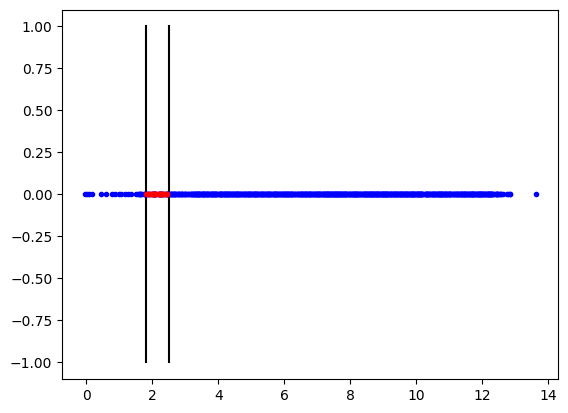

In [383]:
T = array2completed_tree(vmag)
b = range_query(T, 1.8, 2.5)
df = pd.DataFrame({"id": [ids[i] for i in range(len(vmag)) if vmag[i] in b], "Vmag": b})

plt.plot([1.8, 1.8], [-1,1], "k")
plt.plot([2.5, 2.5], [-1, 1], "k")

plt.plot(vmag, [0 for _ in range(len(vmag))], "b.")
plt.plot(b, [0 for _ in range(len(b))], "r.")

df

### 1.3

In [384]:
def plotRectangle(R):
    x = [R[0][0], R[0][0], R[1][0], R[1][0], R[0][0]]
    y = [R[0][1], R[1][1], R[1][1], R[0][1], R[0][1]]
    plt.fill(x, y, 'b', alpha=0.1, label="Region Querry")

,id,Vmag,Plx
0,310,2.07,33.60
1,320,2.28,59.89
2,454,2.40,42.14
3,508,2.04,34.04
4,626,2.01,49.48
5,674,2.09,35.14
6,744,1.90,39.72
7,753,1.93,31.12
8,792,2.34,41.07
9,793,1.81,26.38


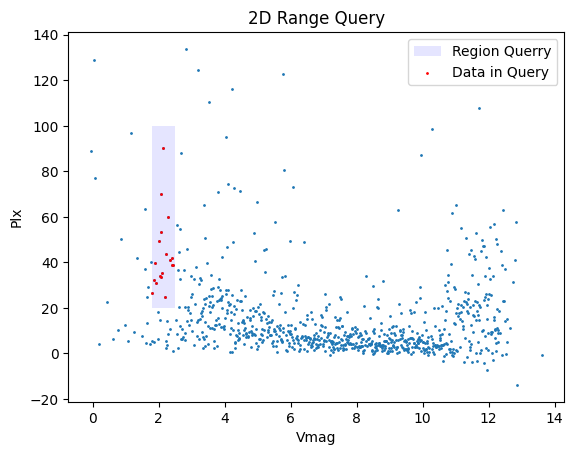

In [385]:
root = build_kd_tree(plx_vmag, 0)
r = search_Kd_tree(root, [[1.8, 2.5], [20, 100]])
d = {"id":[] , "Vmag":[] , "Plx":[]}
for i in plx_vmag:
    if i in r:
        d["id"].append(ids[plx_vmag.index(i)])
        d["Vmag"].append(i[0])
        d["Plx"].append(i[1])

df = pd.DataFrame(d)

plt.scatter([i[0] for i in plx_vmag], [i[1] for i in plx_vmag], s=1)
plotRectangle([(1.8, 20), (2.5, 100)])
plt.scatter([i[0] for i in r], [i[1] for i in r], s=1, c="red" , label = "Data in Query")
plt.title("2D Range Query")
plt.xlabel("Vmag")
plt.ylabel("Plx")
plt.legend()
df


# Parte 2

### 4
#### 4.1

#### 4.2

In [386]:
sp.init_printing()
a1 = 2
b1 = 3
ls = np.linspace(0,50,2000)

a,b,w = sp.symbols("a,b,w", positive = True, real = True)
t = sp.symbols("t", real = True, positive = True)
x,y,z,alpha,dalpha,ddalpha,T,N,B,k,tau = sp.symbols("x,y,z,alpha,dalpha,ddalpha,T,N,B,k,tau", cls = sp.Function)

In [387]:
def norma(x):
  return sp.sqrt(x.dot(x)).simplify()
# def norma(x):
#   return sp.sqrt(np.dot(x,x)).simplify()

In [388]:
x = a*sp.cos(t)
y = b*sp.sin(t)
z = t
alpha = sp.Matrix([[x,y,z]])
display(alpha)

[a⋅cos(t)  b⋅sin(t)  t]

In [389]:
dalpha = sp.diff(alpha,t)
dalpha_norm = norma(dalpha)
display(dalpha)
display()


[-a⋅sin(t)  b⋅cos(t)  1]

In [390]:
ddalpha = sp.diff(dalpha,t)
display(ddalpha)
display(norma(ddalpha))

[-a⋅cos(t)  -b⋅sin(t)  0]

In [391]:
dddalpha = sp.diff(ddalpha,t)
display(dddalpha)
display(norma(dddalpha))

[a⋅sin(t)  -b⋅cos(t)  0]

In [392]:
T = dalpha/dalpha_norm
display(T)
# T.norm().simplify()
norma(T)

⎡           -a⋅sin(t)                          b⋅cos(t)                       
⎢────────────────────────────────  ────────────────────────────────  ─────────
⎢   _____________________________     _____________________________     ______
⎢  ╱  2    2       2    2            ╱  2    2       2    2            ╱  2   
⎣╲╱  a ⋅sin (t) + b ⋅cos (t) + 1   ╲╱  a ⋅sin (t) + b ⋅cos (t) + 1   ╲╱  a ⋅si

      1                ⎤
───────────────────────⎥
_______________________⎥
 2       2    2        ⎥
n (t) + b ⋅cos (t) + 1 ⎦

In [393]:
dT = sp.diff(T,t)
display(dT)

⎡    ⎛   2                  2              ⎞                                  
⎢  a⋅⎝- a ⋅sin(t)⋅cos(t) + b ⋅sin(t)⋅cos(t)⎠⋅sin(t)               a⋅cos(t)    
⎢- ──────────────────────────────────────────────── - ────────────────────────
⎢                                       3/2              _____________________
⎢          ⎛ 2    2       2    2       ⎞                ╱  2    2       2    2
⎣          ⎝a ⋅sin (t) + b ⋅cos (t) + 1⎠              ╲╱  a ⋅sin (t) + b ⋅cos 

            ⎛   2                  2              ⎞                           
          b⋅⎝- a ⋅sin(t)⋅cos(t) + b ⋅sin(t)⋅cos(t)⎠⋅cos(t)               b⋅sin
────────  ──────────────────────────────────────────────── - ─────────────────
________                                       3/2              ______________
                  ⎛ 2    2       2    2       ⎞                ╱  2    2      
(t) + 1           ⎝a ⋅sin (t) + b ⋅cos (t) + 1⎠              ╲╱  a ⋅sin (t) + 

                    2                  2          

In [394]:
dTnorm = norma(dT)

⎡                           _____________________________                     
⎢               ⎛ 2    ⎞   ╱  2    2       2    2                             
⎢            -a⋅⎝b  + 1⎠⋅╲╱  a ⋅sin (t) + b ⋅cos (t) + 1 ⋅cos(t)              
⎢──────────────────────────────────────────────────────────────────────────── 
⎢   ______________________________________                                    
⎢  ╱  2  2    2    2       2    2    2     │ 2    2       2    2       2    │ 
⎢╲╱  a ⋅b  - a ⋅sin (t) + a  + b ⋅sin (t) ⋅│a ⋅sin (t) - b ⋅sin (t) + b  + 1│ 
⎣                                                                             

                            _____________________________                     
                ⎛ 2    ⎞   ╱  2    2       2    2                             
             -b⋅⎝a  + 1⎠⋅╲╱  a ⋅sin (t) + b ⋅cos (t) + 1 ⋅sin(t)              
 ──────────────────────────────────────────────────────────────────────────── 
    ______________________________________         

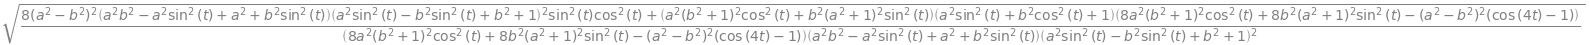

In [408]:
N = dT/dTnorm
N.simplify()
display(N)
display(norma(N))


-a*(b**2 + 1)*cos(t)/(sqrt((a**2*b**2 - a**2*sin(t)**2 + a**2 + b**2*sin(t)**2)/(a**2*sin(t)**2 - b**2*sin(t)**2 + b**2 + 1)**2)*(a**2*sin(t)**2 + b**2*cos(t)**2 + 1)**1.5)


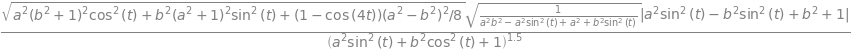

In [396]:
N2 = (-a*(b**2 + 1)*sp.cos(t)/(sp.sqrt((a**2*b**2 - a**2*sp.sin(t)**2 + a**2 + b**2*sp.sin(t)**2)/(a**2*sp.sin(t)**2 - b**2*sp.sin(t)**2 + b**2 + 1)**2)*(a**2*sp.sin(t)**2 + b**2*sp.cos(t)**2 + 1)**(3/2)),
 -b*(a**2 + 1)*sp.sin(t)/(sp.sqrt((a**2*b**2 - a**2*sp.sin(t)**2 + a**2 + b**2*sp.sin(t)**2)/(a**2*sp.sin(t)**2 - b**2*sp.sin(t)**2 + b**2 + 1)**2)*(a**2*sp.sin(t)**2 + b**2*sp.cos(t)**2 + 1)**(3/2)),
 (-a**2 + b**2)*sp.sin(t)*sp.cos(t)/(sp.sqrt((a**2*b**2 - a**2*sp.sin(t)**2 + a**2 + b**2*sp.sin(t)**2)/(a**2*sp.sin(t)**2 - b**2*sp.sin(t)**2 + b**2 + 1)**2)*(a**2*sp.sin(t)**2 + b**2*sp.cos(t)**2 + 1)**(3/2)))
print(N2[0])
display(sp.sqrt(np.dot(N2,N2)).simplify())

In [397]:
B = T.cross(N)

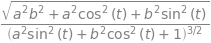

In [398]:
k = dalpha.cross(ddalpha).norm()/(dalpha.norm())**3
display(k.simplify())

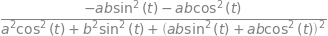

In [399]:
tau = -dalpha.cross(ddalpha).dot(dddalpha)/(dalpha.cross(ddalpha).norm()**2)
display(tau)

In [400]:
K = sp.lambdify(t,k.subs(a,a1).subs(b,b1))(ls)
Tau = sp.lambdify(t,tau.subs(a,a1).subs(b,b1))(ls)

In [401]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ls, y=K, name="Curvature"))
fig.add_trace(go.Scatter(x=ls, y=Tau, name="Torsion"))
fig.update_layout(title="Curvature and Torsion", xaxis_title="t", yaxis_title="k(t) and tau(t)")
fig.show()


In [402]:
X = sp.lambdify(t,x.subs(a,a1).subs(b,b1))(ls)
Y = sp.lambdify(t,y.subs(a,a1).subs(b,b1))(ls)
Z = sp.lambdify(t,z.subs(a,a1).subs(b,b1))(ls)

fig = px.line_3d(x=X, y=Y,z=Z, title="Parametrized curve")
fig.show()

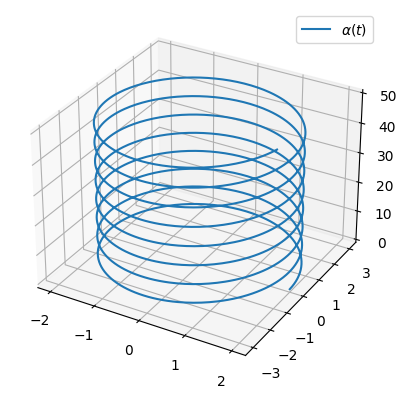

In [403]:
# plot alpha with matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Y, Z, label=r"$\alpha(t)$")
ax.legend()
plt.show()


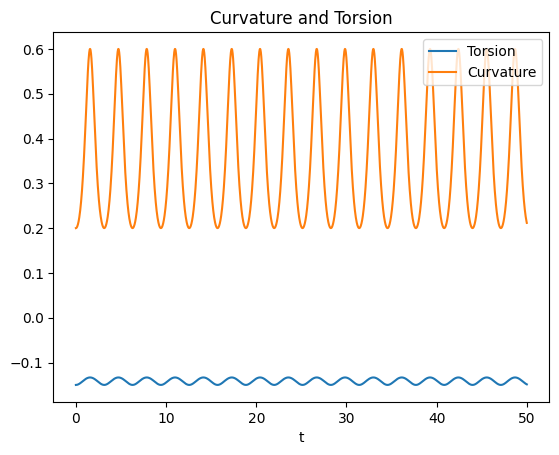

In [404]:
plt.plot(ls, Tau, label="Torsion")
plt.plot(ls, K, label="Curvature")

plt.title("Curvature and Torsion")
plt.xlabel("t")
plt.legend()

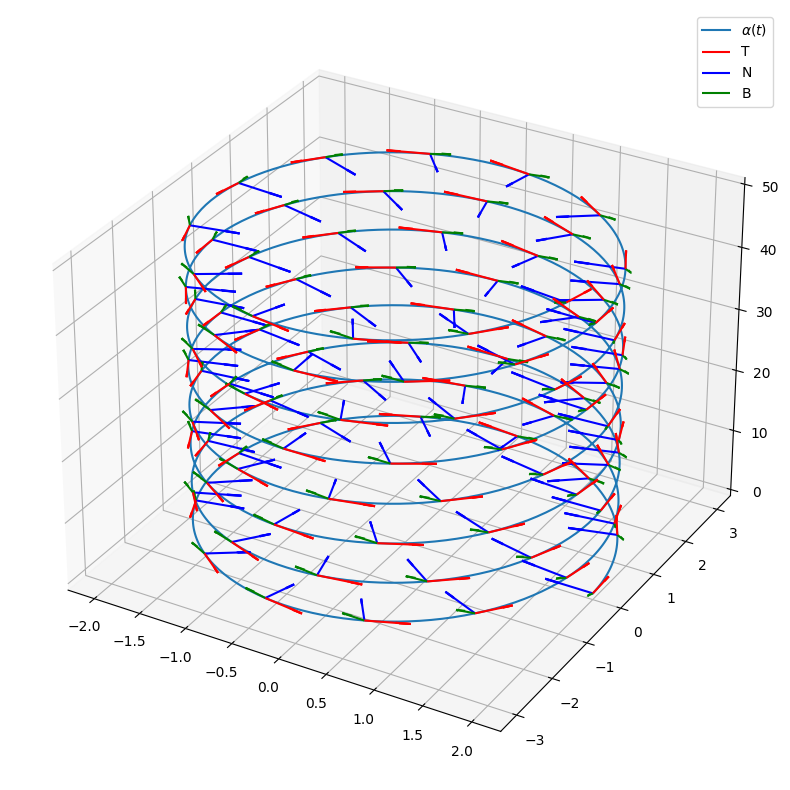

In [405]:
# use quiver to plot TNB
ls2 = np.linspace(0,50,100)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Y, Z, label=r"$\alpha(t)$")

Xp = sp.lambdify(t,x.subs(a,a1).subs(b,b1))(ls2)
Yp = sp.lambdify(t,y.subs(a,a1).subs(b,b1))(ls2)
Zp = sp.lambdify(t,z.subs(a,a1).subs(b,b1))(ls2)

# convert to lambda functions
Tx = sp.lambdify(t,T[0].subs(a,a1).subs(b,b1))(ls2)
Ty = sp.lambdify(t,T[1].subs(a,a1).subs(b,b1))(ls2)
Tz = sp.lambdify(t,T[2].subs(a,a1).subs(b,b1))(ls2)

Nx = sp.lambdify(t,N[0].subs(a,a1).subs(b,b1))(ls2)
Ny = sp.lambdify(t,N[1].subs(a,a1).subs(b,b1))(ls2)
Nz = sp.lambdify(t,N[2].subs(a,a1).subs(b,b1))(ls2)

Bx = sp.lambdify(t,B[0].subs(a,a1).subs(b,b1))(ls2)
By = sp.lambdify(t,B[1].subs(a,a1).subs(b,b1))(ls2)
Bz = sp.lambdify(t,B[2].subs(a,a1).subs(b,b1))(ls2)

ax.quiver(Xp, Yp, Zp, Tx, Ty, Tz, length=0.5, normalize=True, color="red", label="T")
ax.quiver(Xp, Yp, Zp, Nx, Ny, Nz, length=0.5, normalize=True, color="blue", label="N")
ax.quiver(Xp, Yp, Zp, Bx, By, Bz, length=0.5, normalize=True, color="green", label="B")

ax.legend()
plt.show()



In [406]:
type(N)

sympy.matrices.dense.MutableDenseMatrix